<a href="https://colab.research.google.com/github/Nrup2002/Amazon-Sales-Data-Analysis/blob/main/Amazon_Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name- Tejas Golhar Project 1 Amazon Sales Data Analysis

In [1]:
# importing required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("Amazon Sales data.csv")
#df.style.set_caption('Amazon Sales Data Analysis')
df.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75


### **Getting information about the Data.**

In [3]:
# checking the shape
df.shape

(100, 14)

In [4]:
# checking the columns in the data
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [5]:
# Basic info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


### here we have Data type **float64**, **int64**, **object** and **datetime64[ns]**

In [6]:
# Getting more info about data like count, mean, min, max.
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [7]:
# checking if any null values present in the data
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [8]:
# Cheking also for any duplicates values in the data
df.duplicated().sum()

0

#### observation : No Duplicate values in data

In [9]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

## Now let's create heatmap to find correlation between features.

<ipython-input-10-b0af1229f951>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'),annot=True, cmap='YlOrBr')


<Axes: >

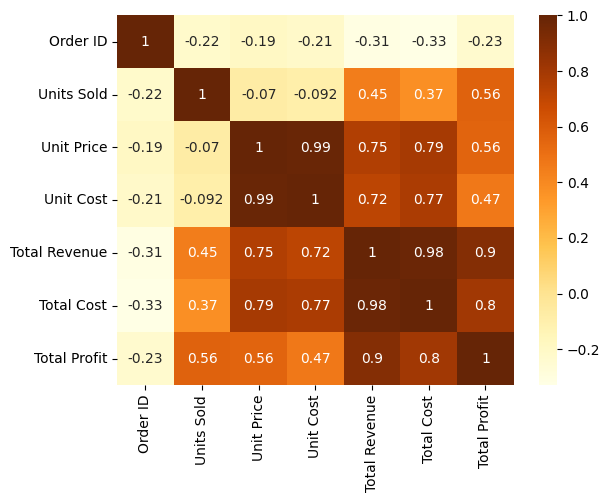

In [10]:
sns.heatmap(df.corr(method='pearson'),annot=True, cmap='YlOrBr')

## Observations:
* As you can see in the above heatmap **Unit Price** and **Unit Cost** are Highly corelated.
* Also **Unit Price** moderately related to **Total Revenue** and **Total Cost** but less related to **Total Profit**.
* lastly their No relation between **Order ID** and rest other features.

In [11]:
df['Item Type'].value_counts()

Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: Item Type, dtype: int64

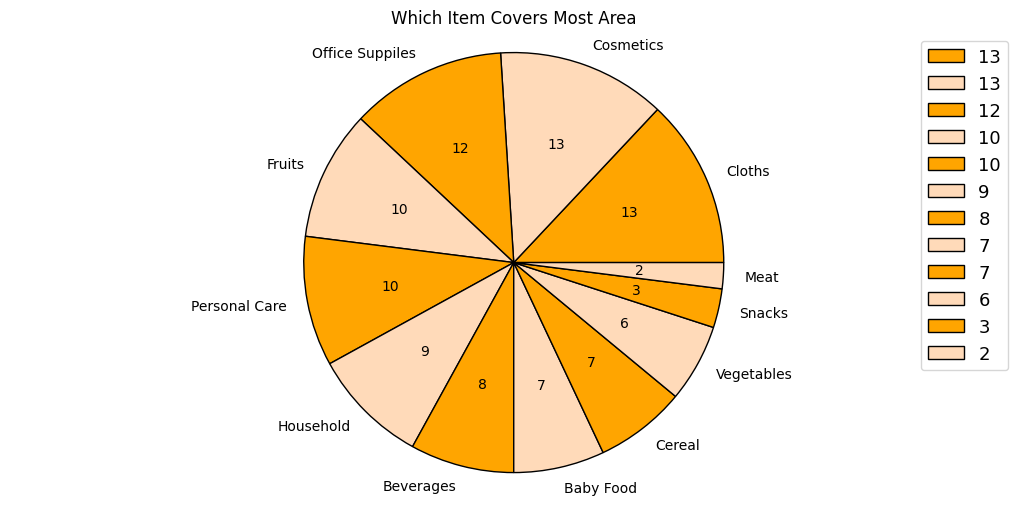

In [12]:
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
labels = ('Cloths','Cosmetics','Office Suppiles','Fruits','Personal Care','Household','Beverages','Baby Food','Cereal','Vegetables','Snacks','Meat')
colors = ('orange','peachpuff','orange','peachpuff','orange','peachpuff','orange','peachpuff','orange','peachpuff','orange','peachpuff')
plt.figure(figsize = (13, 6))
plt.pie(df['Item Type'].value_counts(),data = df, 
        autopct = '%0.0f',shadow = False ,
        colors = colors,labels = labels,
        wedgeprops = wp)
plt.axis('equal')
plt.title('Which Item Covers Most Area')
plt.legend(df['Item Type'].value_counts(), fontsize= 13)
plt.show()

In [13]:
df['Order Priority'].value_counts()

H    30
L    27
C    22
M    21
Name: Order Priority, dtype: int64

In [14]:
df['Order Priority'].value_counts().to_dict()

{'H': 30, 'L': 27, 'C': 22, 'M': 21}

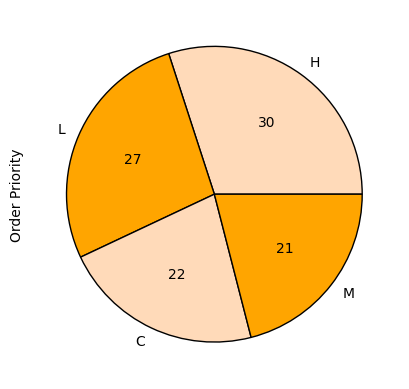

In [15]:
colors = {'orange','peachpuff','orange','peachpuff'}
wp = {'linewidth': 1, 'edgecolor': 'black'}
df['Order Priority'].value_counts().plot(kind='pie',colors = colors,wedgeprops = wp, autopct = '%0.0f')
plt.show()

<ipython-input-16-62d8c45e361f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Item Type').mean()['Units Sold'].plot(kind = 'bar',color = 'orange')


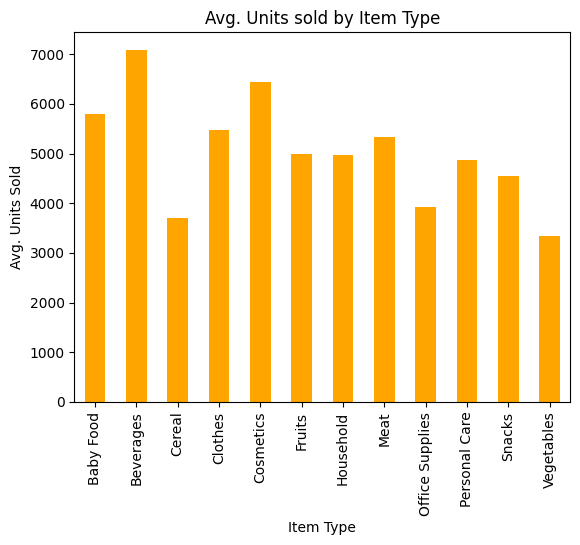

In [16]:
df.groupby('Item Type').mean()['Units Sold'].plot(kind = 'bar',color = 'orange')
plt.title('Avg. Units sold by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Avg. Units Sold')
plt.show()

In [17]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

<ipython-input-18-8e341408ad93>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Order Date').sum()['Total Revenue'].plot(kind = 'line',color = 'orange')


******************** Total Revenue: 137348768.31 ***********************


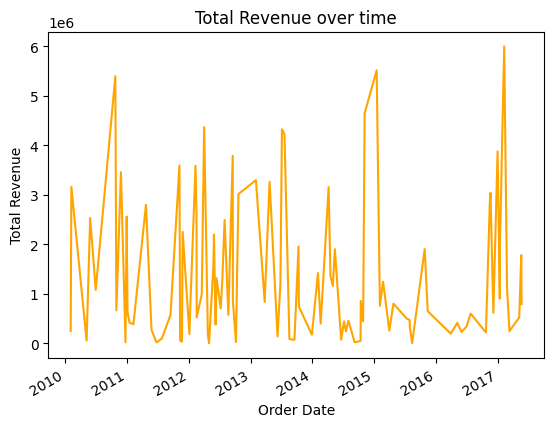

In [18]:
df.groupby('Order Date').sum()['Total Revenue'].plot(kind = 'line',color = 'orange')
plt.title('Total Revenue over time')
plt.xlabel('Order Date')
plt.ylabel('Total Revenue')
print('*'*20,'Total Revenue:',df['Total Revenue'].sum(),'*'*23)
plt.show()

## Month-wise Sales

In [19]:
df['Order Month'] = df['Order Date'].dt.month

<ipython-input-20-d208b96d1ed8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Order Month').sum()['Total Revenue'].plot(kind = 'bar', color = 'orange')


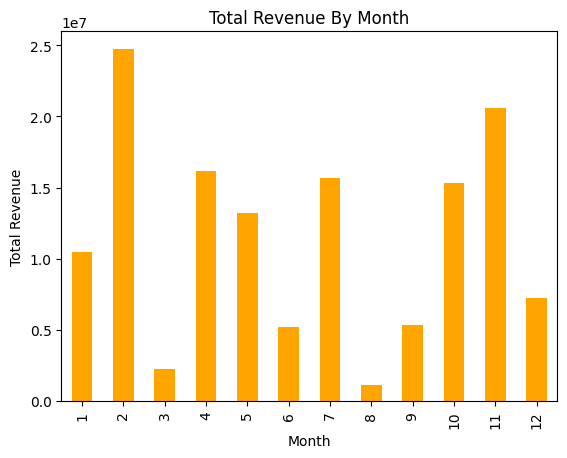

In [20]:
df.groupby('Order Month').sum()['Total Revenue'].plot(kind = 'bar', color = 'orange')
plt.title('Total Revenue By Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

## Year-wise Sales

In [21]:
df['Order Year'] = df['Order Date'].dt.year

<ipython-input-22-c6742b531681>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Order Year').sum()['Total Revenue'].plot(kind = 'bar', color = 'orange')


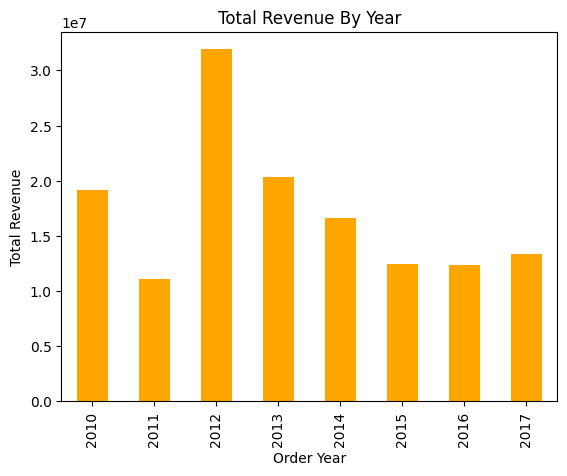

In [22]:
df.groupby('Order Year').sum()['Total Revenue'].plot(kind = 'bar', color = 'orange')
plt.title('Total Revenue By Year')
plt.xlabel('Order Year')
plt.ylabel('Total Revenue')
plt.show()

## Relation between **Unit Price** and **Total Revenue**.
#### As **Unit Price** increases **Total Revenue** Increases.

Text(0, 0.5, 'Total Revenue')

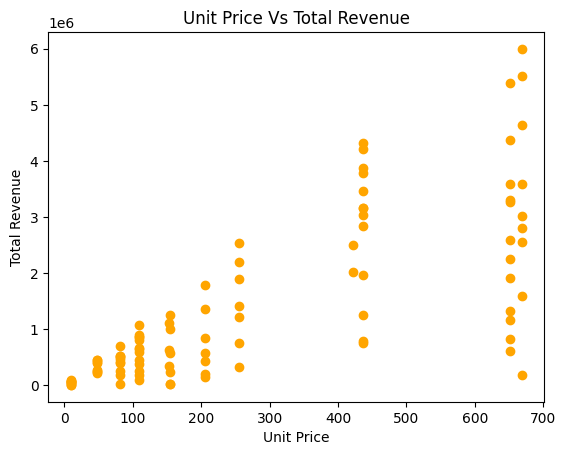

In [23]:
plt.scatter(df['Unit Price'],df['Total Revenue'],color = 'orange')
plt.title('Unit Price Vs Total Revenue')
plt.xlabel('Unit Price')
plt.ylabel('Total Revenue')

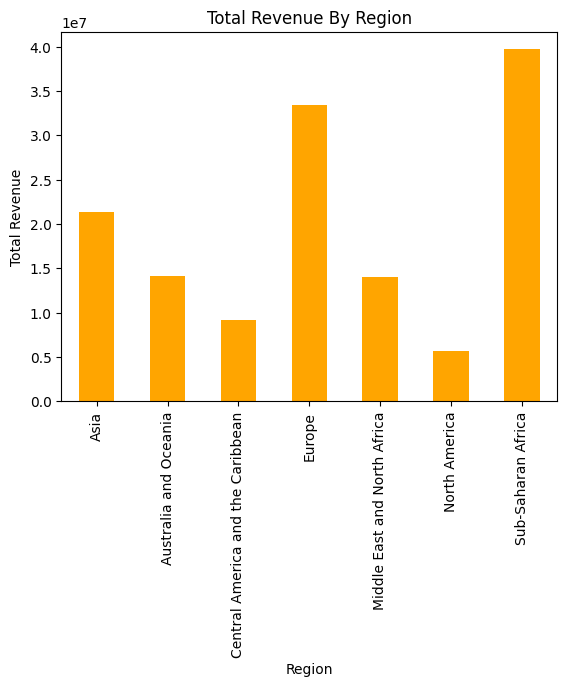

In [24]:
df.groupby('Region')['Total Revenue'].sum().plot(kind = 'bar', color = 'orange')
plt.title('Total Revenue By Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()

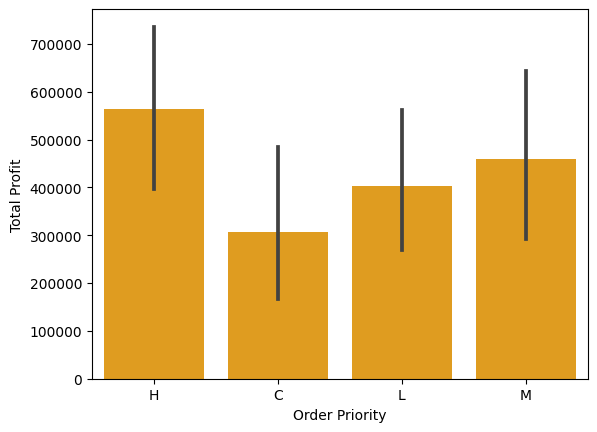

In [25]:
sns.barplot(x= 'Order Priority', y= 'Total Profit',color = 'orange', data =df)
plt.show()

# Yearly-Month wise

In [26]:
# yearly-month wise

Yearly_Monthwise = df.groupby(['Order Month','Order Year']).sum().reset_index()
Yearly_Monthwise.head()

<ipython-input-26-10f2b19d40b4>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Yearly_Monthwise = df.groupby(['Order Month','Order Year']).sum().reset_index()


,Order Month,Order Year,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,1,2011,302867435,12914,200.03,129.23,1042225.35,678716.31,363509.04
1,1,2012,1792916511,1548,1319.48,1027.50,1012884.00,806315.64,206568.36
2,1,2015,177713572,8250,668.27,502.54,5513227.50,4145955.00,1367272.50
3,1,2017,1012615131,13030,531.17,400.53,2914130.27,2034623.15,879507.12
4,2,2010,767775368,9503,546.48,299.17,3410661.12,1986250.18,1424410.94


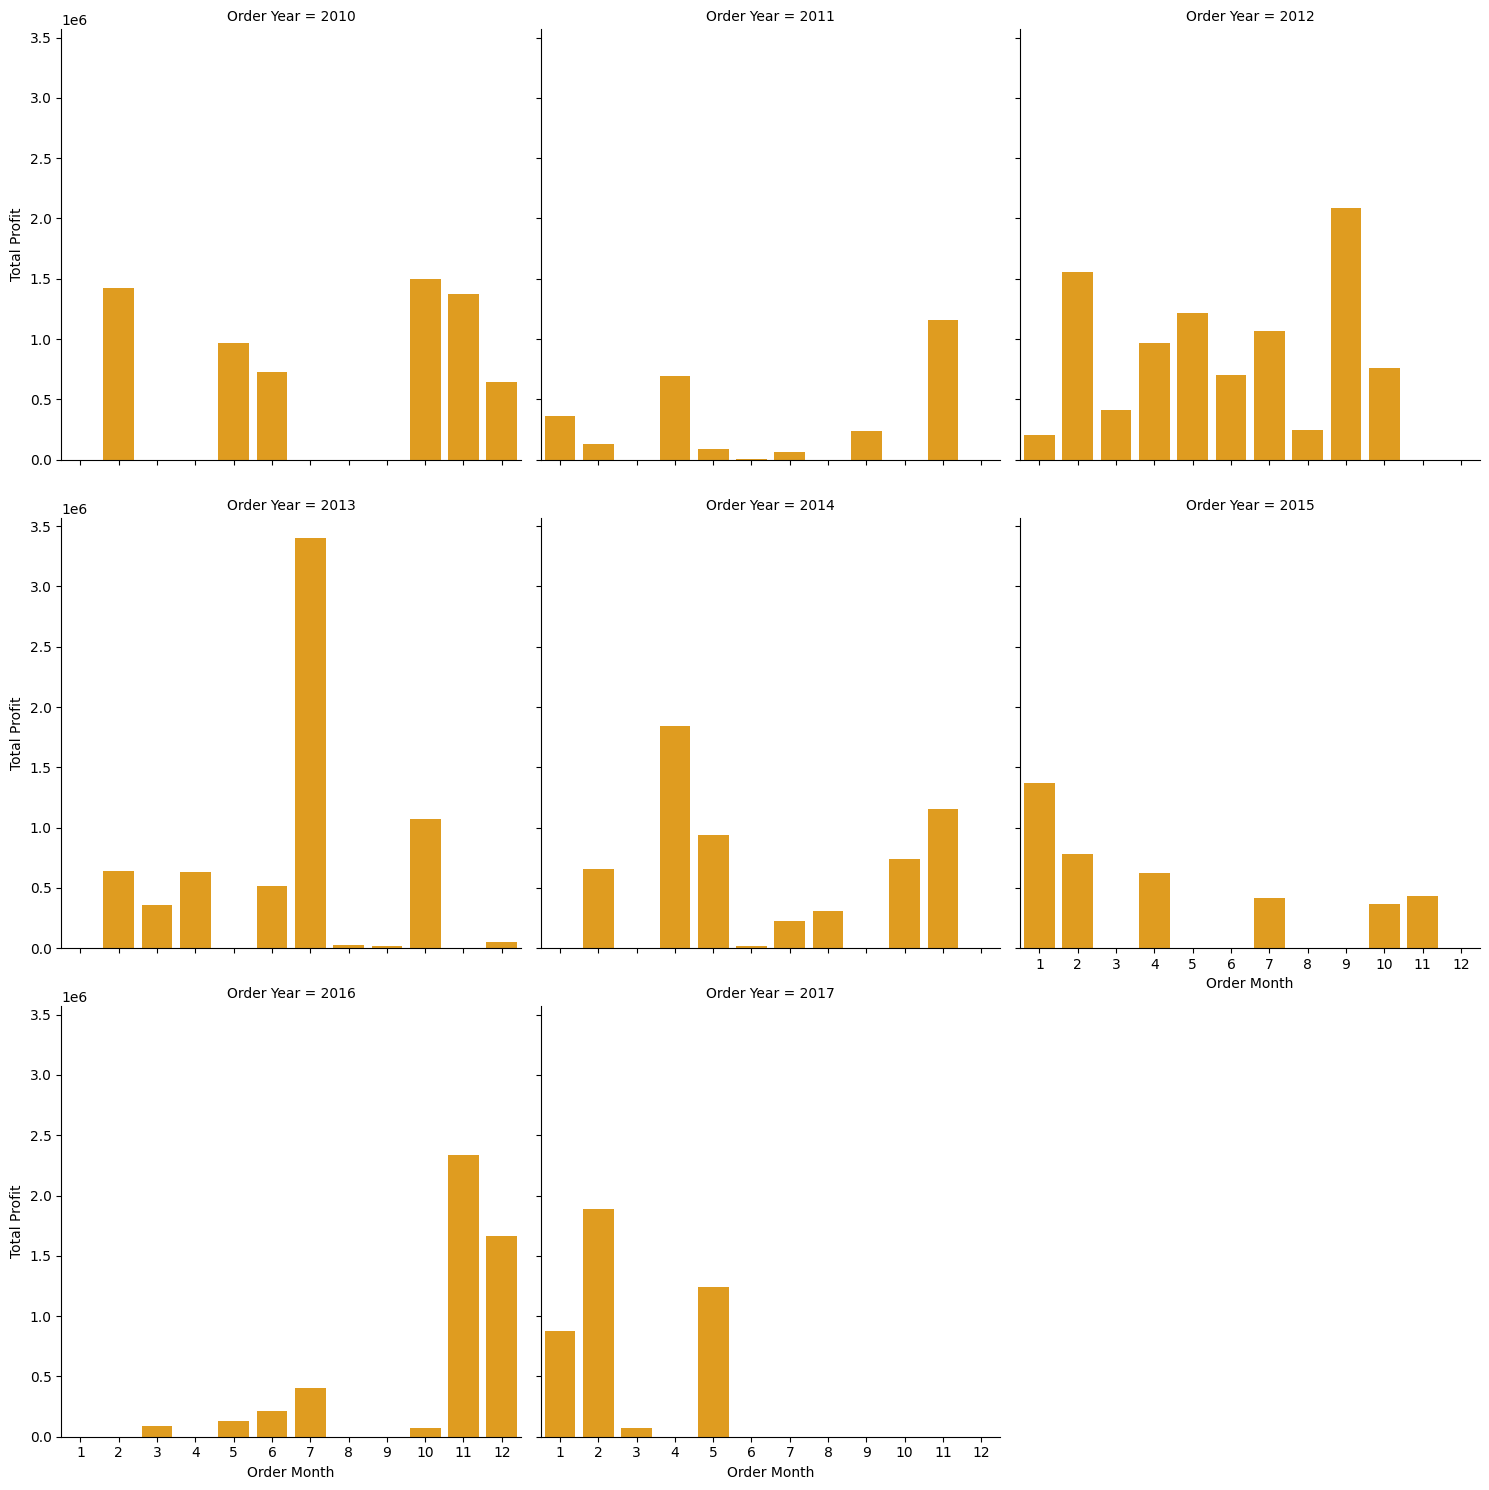

In [27]:
sns.catplot(x ='Order Month', y = 'Total Profit', data = Yearly_Monthwise, kind = 'bar',color = 'orange', col = 'Order Year', col_wrap = 3)